In [1]:
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

from function.utilities import get_subset
from function.seqfilter import SeqFilter

# Param

In [31]:
#####CHANGE HERE#####
algorithm = "VLXT" #VLXT, VSL2, VL3-BA, fldpnn
#####CHANGE HERE#####

algorithms = ["VLXT", "VSL2", "VL3-BA", "fldpnn"]

In [32]:
protein_subset = ["human", "rbp", "mrbp", "trbp", "snrbp", "snorbp", "ncrbp", "rrbp", "irrbp"]

plot_subset = ['>=30','>=40','>=50'] #'>=20', '>=30', '>=40', '>=50', '>=60' 
table_s1_path = Path('./output/table_s1')
figure_1a_path = Path('./output/figure_1a')

# Load data

In [33]:
pondr_disorder_ident_path = Path("./output/pondr_disorder_ident")

od_human_df = pd.read_pickle(pondr_disorder_ident_path / "{}_od_human_df.pkl".format(algorithm))
# od_rbp_df = get_subset(od_human_df, "rbp")
# od_mrbp_df = get_subset(od_human_df, "mrbp")

In [34]:
od_human_df

,uniprot_id,order_sequence,disorder_sequence,od_ident
0,A0A024RBG1,**********************CLCF*SEQEDEVLL*SSS******...,MMKFKPNQTRTYDREGFKKRAA****R*********V***RYPDQW...,1111111111111111111111000010000000001000111111...
1,A0A075B6H7,*****QLLFLLLLWLPDTTREIV**********************S...,MEAPA******************MTQSPPTLSLSPGERVTLSCRA*...,1111100000000000000000011111111111111111111110...
2,A0A075B6H8,*******QLLGLLLLWLPGVRFDIQMTQSPSFLSASVGDRVSIICW...,MDMRVPA***************************************...,1111111000000000000000000000000000000000000000...
3,A0A075B6H9,*AWTPLLFLTLLLHCTGSL************************LSS...,M******************SQLVLTQSPSASASLGASVKLTCT***...,1000000000000000000111111111111111111111111000...
4,A0A075B6I0,**********LLLGLLAYGSGV*************VSPGGT*****...,MSVPTMAWMM************DSQTVVTQEPSFS******VTLTC...,1111111111000000000000111111111111100000011111...
...,...,...,...,...
20320,Q9YNA8,*********SKYASYLSFIKILLKRGGVKVSTKNLIKLFQIIEQFC...,MGQTKSKIK*************************************...,1111111110000000000000000000000000000000000000...
20321,U3KPV4,******LRAWKRIFWRQILLTLGLLGLFLYGLPKFRHLEALIPMGV...,MALKEG****************************************...,1111110000000000000000000000000000000000000000...
20322,W5XKT8,MA**ALASAVPSALLALAVFRVPAWACLLCFTTYSERLRICQMF**...,**LL****************************************VG...,0011000000000000000000000000000000000000000011...
20323,W6CW81,******EILLLTSLDNITDEELDRFKCFLPDEFNIATGKLHTLNST...,MESKYK****************************************...,1111110000000000000000000000000000000000000000...


# Consecutive disordered stat

In [61]:
def length_filter(disorder_length, od_ident):
    """
    filter disorder length longer than disorder_length
    
    disorder_length: int, 
    od_ident: str, order/disorder indication seq, 1 is disorder, 0 is order
    """
    count = 0
    for i in od_ident:
        if i == "1":
            count = count + 1
            if count >= disorder_length:
                return 1
        else:
            count = 0
    return 0

def make_consecutive_disorder_stat(df):
    
    #count sequences which disorder length are longer than condition
    df[">=20"] = df["od_ident"].apply(lambda x: length_filter(20, x))
    df[">=30"] = df["od_ident"].apply(lambda x: length_filter(30, x))
    df[">=40"] = df["od_ident"].apply(lambda x: length_filter(40, x))
    df[">=50"] = df["od_ident"].apply(lambda x: length_filter(50, x))
    df[">=60"] = df["od_ident"].apply(lambda x: length_filter(60, x))

    b20 = df[">=20"].value_counts()[1] / len(df)
    b30 = df[">=30"].value_counts()[1] / len(df)
    b40 = df[">=40"].value_counts()[1] / len(df)
    b50 = df[">=50"].value_counts()[1] / len(df)
    b60 = df[">=60"].value_counts()[1] / len(df)

    b20 = round(b20 * 100, 1)
    b30 = round(b30 * 100, 1)
    b40 = round(b40 * 100, 1)
    b50 = round(b50 * 100, 1)
    b60 = round(b60 * 100, 1)

    return {">=20": b20,
            ">=30": b30, 
            ">=40": b40, 
            ">=50": b50,
            ">=60": b60,}

In [62]:
output = {}
for algorithm in algorithms:
    
    subsets = {}
    for i in protein_subset:
        od_subset_df = get_subset(od_human_df, i)
        od_stat = make_consecutive_disorder_stat(od_subset_df)

        subsets[i] = {"nums":len(od_subset_df),
                      "stat":od_stat}

    output[algorithm] = {"algorithm":algorithm} | subsets

In [66]:
output

{'VLXT': {'algorithm': 'VLXT',
  'human': {'nums': 20325,
   'stat': {'>=20': 81.8,
    '>=30': 65.6,
    '>=40': 52.0,
    '>=50': 41.7,
    '>=60': 33.7}},
  'rbp': {'nums': 1533,
   'stat': {'>=20': 92.6,
    '>=30': 79.5,
    '>=40': 66.2,
    '>=50': 54.7,
    '>=60': 45.9}},
  'mrbp': {'nums': 688,
   'stat': {'>=20': 93.6,
    '>=30': 84.4,
    '>=40': 73.0,
    '>=50': 62.6,
    '>=60': 55.5}},
  'trbp': {'nums': 151,
   'stat': {'>=20': 92.1,
    '>=30': 69.5,
    '>=40': 47.0,
    '>=50': 29.8,
    '>=60': 19.2}},
  'snrbp': {'nums': 89,
   'stat': {'>=20': 89.9,
    '>=30': 82.0,
    '>=40': 71.9,
    '>=50': 59.6,
    '>=60': 51.7}},
  'snorbp': {'nums': 41,
   'stat': {'>=20': 95.1,
    '>=30': 87.8,
    '>=40': 78.0,
    '>=50': 65.9,
    '>=60': 61.0}},
  'ncrbp': {'nums': 122,
   'stat': {'>=20': 91.0,
    '>=30': 71.3,
    '>=40': 64.8,
    '>=50': 54.9,
    '>=60': 48.4}},
  'rrbp': {'nums': 122,
   'stat': {'>=20': 98.4,
    '>=30': 88.5,
    '>=40': 77.9,
    '>=50'

# Plot: fig 1a

In [ ]:
need_plot = ['']

In [ ]:
list(map(d.get, l))

In [71]:
output['VLXT']['mrbp']

{'nums': 688,
 'stat': {'>=20': 93.6,
  '>=30': 84.4,
  '>=40': 73.0,
  '>=50': 62.6,
  '>=60': 55.5}}

In [72]:
plot_subset

['>=30', '>=40', '>=50']

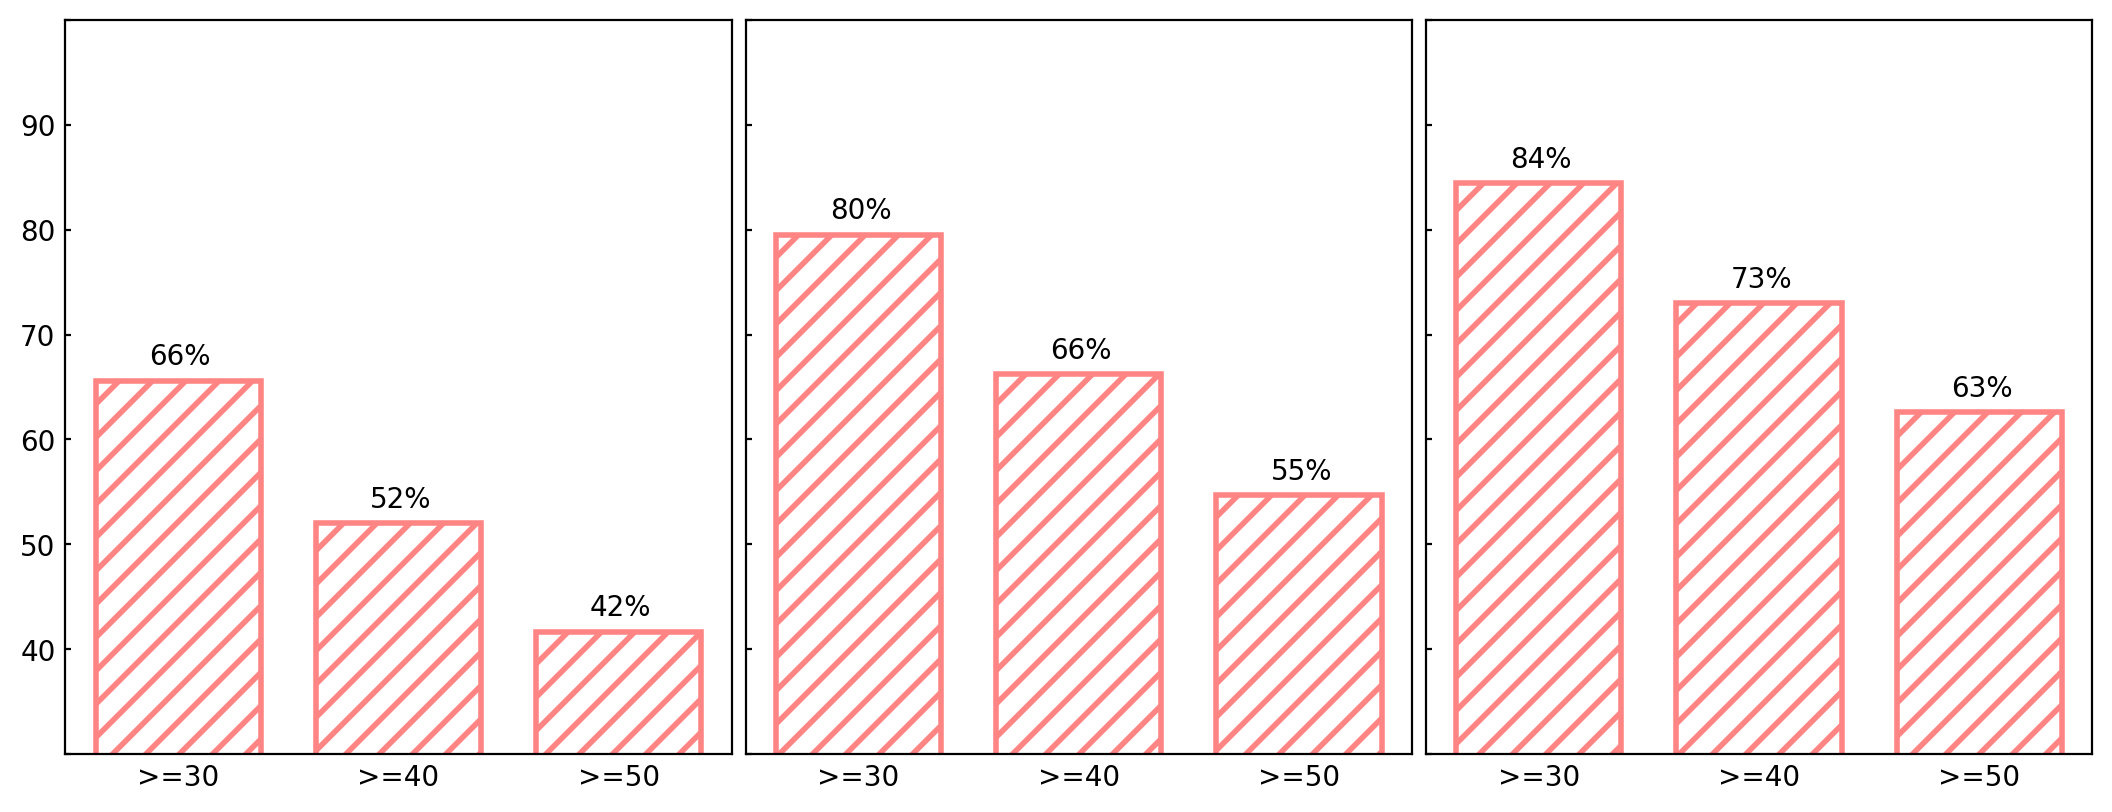

In [30]:
#batch plot
def plot(subset, subplot):
    
    plot_data = [output[subset]['stat'][x] for x in plot_subset]
    
    subplot.bar(X, plot_data, width=0.75, tick_label=plot_subset, color="white", hatch="//", linewidth=2, edgecolor="#ff8484")
    for x, y in zip(X,plot_data):
        subplot.text(x-0.13, y+1.5, "{}%".format(str(round(y))),fontsize=10)
    
#     subplot.set_title("{}".format(output[subset]['subset']))
    subplot.set_ylim(30,100)
    subplot.tick_params(axis="y",direction="in", length=2)
    subplot.tick_params(axis="x",direction="in", width=0, length=0)
    yticks = subplot.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False)
    yticks[-1].label1.set_visible(False)

    
    
mpl.rcParams["hatch.linewidth"] = 2
f, ((a0, a1, a2), (a3, a4, a5), (a6, a7, a8)) = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9, 4), dpi=200)

X = np.arange(0, len(plot_subset))

plot("human", a0)
plot("rbp", a1)
plot("mrbp", a2)

plt.tight_layout(pad=0.5)
output_path = figure_1a_path / "{}.jpg".format(algorithm)
f.savefig(output_path)

In [32]:
df = pd.DataFrame()
for i in expset:
    df['length_longer_than'] = output[i]['stat'].keys()
    df[i] = output[i]['stat'].values()

output_path = path / "{}.csv".format(algorithm)
df.to_csv(output_path, index=False, sep=' ')

# table s1 output

In [22]:
df = pd.DataFrame()

df["Length longer than"] = output["human"].keys()
df["Human proteins (%)"] = output["human"].values()
df["RNA binding proteins (%)"] = output["rbp"].values()
df["(RBP Human) (%)"] = df["RNA binding proteins (%)"] - df['Human proteins (%)']
df["mRNA binding proteins (%)"] = output["mrbp"].values()
df["(mRBP Human) (%)"] = df["mRNA binding proteins (%)"] - df["Human proteins (%)"]

df.to_excel(table_s1_path/"{}.xlsx".format(algorithm))
df

,Length longer than,Human proteins (%),RNA binding proteins (%),(RBP Human) (%),mRNA binding proteins (%),(mRBP Human) (%)
0,>=20,83.3,93.3,10.0,93.9,10.6
1,>=30,76.3,88.0,11.7,90.1,13.8
2,>=40,68.5,80.9,12.4,84.3,15.8
3,>=50,61.6,74.4,12.8,79.7,18.1
4,>=60,55.7,66.6,10.9,74.1,18.4
